In [1]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [2]:
IMG_SIZE = (224, 224)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))


In [3]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('C:/Users/91830/OneDrive/Desktop/Project_dataset/Train', target_size=IMG_SIZE, batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('C:/Users/91830/OneDrive/Desktop/Project_dataset/Test/', target_size=IMG_SIZE, batch_size=32, class_mode='categorical')


Found 9871 images belonging to 2 classes.
Found 1167 images belonging to 2 classes.


In [6]:

model.fit(train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size, epochs=10, validation_data=test_generator, validation_steps=test_generator.n//test_generator.batch_size)


Epoch 1/10
308/308 [==============================] - 2442s 8s/step - loss: 0.1268 - accuracy: 0.9615 - val_loss: 0.6080 - val_accuracy: 0.7830
Epoch 2/10
308/308 [==============================] - 2406s 8s/step - loss: 0.0420 - accuracy: 0.9871 - val_loss: 1.1991 - val_accuracy: 0.8663
Epoch 3/10
308/308 [==============================] - 2419s 8s/step - loss: 0.0332 - accuracy: 0.9906 - val_loss: 2.3788 - val_accuracy: 0.7352
Epoch 4/10
308/308 [==============================] - 2416s 8s/step - loss: 0.0380 - accuracy: 0.9884 - val_loss: 0.0118 - val_accuracy: 0.9974
Epoch 5/10
308/308 [==============================] - 2421s 8s/step - loss: 0.0246 - accuracy: 0.9929 - val_loss: 0.4248 - val_accuracy: 0.9523
Epoch 6/10
308/308 [==============================] - 2420s 8s/step - loss: 0.0096 - accuracy: 0.9974 - val_loss: 0.4014 - val_accuracy: 0.9280
Epoch 7/10
308/308 [==============================] - 3314s 11s/step - loss: 0.0303 - accuracy: 0.9921 - val_loss: 0.2819 - val_accuracy

In [8]:
model.save('C:/Users/91830/OneDrive/Desktop/Project_dataset/Models/DenseNet121.h5')

In [6]:
model1 =tf.keras.models.load_model('C:/Users/91830/OneDrive/Desktop/Project_dataset/Models/DenseNet121.h5')

In [8]:

# prepare the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('C:/Users/91830/OneDrive/Desktop/Project_dataset/Test/', target_size=IMG_SIZE, batch_size=32, class_mode='categorical')

# evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Found 1167 images belonging to 2 classes.
37/37 [==============================] - 57s 1s/step - loss: 0.7859 - accuracy: 0.5518
Test loss: 0.7859
Test accuracy: 0.5518


In [9]:
from tensorflow.keras.applications.densenet import DenseNet201, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'C:/Users/91830/OneDrive/Desktop/Project_dataset/Test/Fire/55_frame_180.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = model.predict(img_array)
if prediction[0][0] > prediction[0][1]:
    print('Fire Detected')
else:
    print('No Fire Detected')


1/1 [==============================] - 1s 1s/step
Fire Detected


In [10]:
from sklearn.metrics import confusion_matrix
# make predictions on the test data
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# get the true labels
y_true = test_generator.classes

# create the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

print('Confusion Matrix:')
print(conf_mat)

37/37 [==============================] - 56s 1s/step
Confusion Matrix:
[[275 200]
 [437 255]]


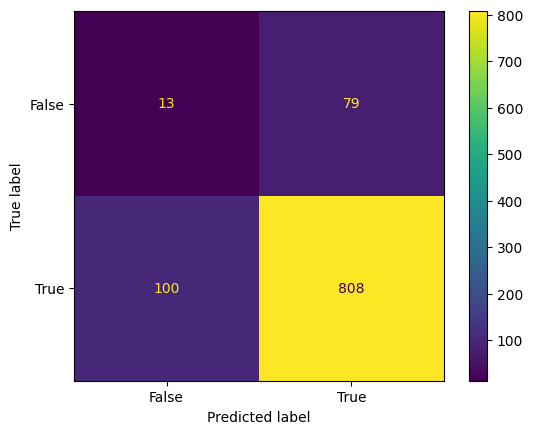

In [11]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()